# **Stats Project-**
# **1. Data Handling:**

Q1. How would you handle missing values in a dataset? Describe at least two
methods?

Handling missing values in a dataset is an essential step in data preprocessing, as missing data can lead to biased results and reduce the accuracy of your analysis. Here are two common methods to handle missing values:

1 Method. Imputation:
a. Mean/Median Imputation:**bold text**

Mean Imputation: For numerical data, missing values can be replaced with the mean of the column. This method is simple and helps to retain the overall distribution of the data.

Median Imputation: If the data is skewed, the median is often a better measure of central tendency than the mean. Replacing missing values with the median can reduce the impact of outliers on your dataset.

b. Mode:

For categorical data, missing values can be filled with the mode, which is the most frequently occurring value in the column. This method is particularly useful when a certain category is predominant and missing values are likely to belong to that category.

In [1]:
import statistics
import pandas as pd

In [12]:
# Sample DataFrame with missing values
sample_data = {'Age': [25, 30, None, 22, 29, None],
        'Gender': ['Male', 'Female', None, 'Female', 'Male', None],
        'Salary': [50000, 60000, None, 55000, 58000, 59000]}

df = pd.DataFrame(sample_data)

# Display missing values for each column
missing_values = df.isnull().sum()
print(missing_values)


Age       2
Gender    2
Salary    1
dtype: int64


In [13]:
# Sample DataFrame with missing values
sample_data = {'Age': [25, 30, None, 22, 29, None]}

df = pd.DataFrame(sample_data)
df['Age'].fillna(df['Age'].mean(), inplace=True)

print(df)


    Age
0  25.0
1  30.0
2  26.5
3  22.0
4  29.0
5  26.5


In [14]:
# Sample DataFrame with missing values
sample_data = {'Salary': [50000, 60000, None, 55000, 58000, 59000]}

df = pd.DataFrame(sample_data)
# Impute missing values in 'Salary' with the median of the column
df['Salary'].fillna(df['Salary'].median(), inplace=True)

print(df)

    Salary
0  50000.0
1  60000.0
2  58000.0
3  55000.0
4  58000.0
5  59000.0


In [15]:
# Sample DataFrame with missing values
sample_data ={'Gender': ['Male', 'Female', None, 'Female', 'Male', None]}

df = pd.DataFrame(sample_data)

# Impute missing values in 'Gender' with the mode of the column
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

print(df)


   Gender
0    Male
1  Female
2  Female
3  Female
4    Male
5  Female


2. Deletion

a. Listwise Deletion (Complete Case Analysis):

Listwise Deletion: This method involves removing any rows that contain missing values. While this approach is straightforward and easy to implement, it can lead to a significant reduction in the size of your dataset, which might result in a loss of valuable information.

b. Pairwise Deletion:

Pairwise Deletion: Instead of removing entire rows, pairwise deletion involves excluding only the missing values during specific analyses. This allows you to retain as much data as possible, but it can be complex and may introduce inconsistencies if different analyses use different amounts of data.

In [16]:
# Sample DataFrame with missing values
sample_data = {'Age': [25, 30, None, 22, 29, None],
        'Gender': ['Male', 'Female', None, 'Female', 'Male', None],
        'Salary': [50000, 60000, None, 55000, 58000, 59000]}

df = pd.DataFrame(sample_data)

# Display missing values for each column
missing_values = df.isnull().sum()
print(missing_values)

Age       2
Gender    2
Salary    1
dtype: int64


In [18]:
# Sample DataFrame with missing values
sample_data = {'Age': [25, 30, None, 22, 29, None],
        'Gender': ['Male', 'Female', None, 'Female', 'Male', None],
        'Salary': [50000, 60000, None, 55000, 58000, 59000]}

df = pd.DataFrame(sample_data)
# Removing rows with any missing values
df.dropna(inplace=True)

print(df)


    Age  Gender   Salary
0  25.0    Male  50000.0
1  30.0  Female  60000.0
3  22.0  Female  55000.0
4  29.0    Male  58000.0


In [21]:
# Sample DataFrame with missing values
sample_data = {'Age': [25, 30, None, 22, 29, None],
        'Salary': [50000, 60000, None, 55000, 58000, 59000]}

df = pd.DataFrame(sample_data)
# Pairwise deletion is often used in statistical software during correlation analysis
# Example in Python:
correlation_matrix = df.corr(method='pearson')

print(df)

    Age   Salary
0  25.0  50000.0
1  30.0  60000.0
2   NaN      NaN
3  22.0  55000.0
4  29.0  58000.0
5   NaN  59000.0


Q2. Explain why it might be necessary to convert data types before performing an
analysis?

Converting data types before performing statistical analysis in Python is crucial because it ensures that the data is in the correct format for the operations and calculations you intend to perform. Here’s why data type conversion is necessary:

1. Ensuring Accurate Calculations
Different data types are handled differently by Python and its libraries (like pandas and numpy). For example:

Numerical Operations: Calculations such as sums, averages, or correlations require data to be in a numeric format (e.g., int or float). If the data is stored as a string, these operations will either fail or produce incorrect results.

Date/Time Calculations: Date and time data often need to be in a datetime format to perform operations like finding the difference between two dates or aggregating data by time periods. If date-time data is stored as strings, it needs to be converted to the datetime type.

2. Optimizing Memory Usage and Performance

Efficient Storage: Converting data types can help optimize memory usage. For example, using int32 instead of int64 when possible can reduce memory consumption, which is important when working with large datasets.

Faster Computation: Operations on the correct data types are usually faster. For example, arithmetic operations on integers and floats are quicker than those on objects (e.g., strings), which need to be parsed or converted during each operation.

3. Avoiding Errors in Analysis

Type Mismatch Errors: If you attempt to perform mathematical operations on non-numeric types (like adding strings to numbers), Python will raise errors. Converting data to the correct type prevents such errors.

Logical Operations: Logical comparisons (e.g., greater than, less than) require consistent data types. Comparing a string with a number can lead to unexpected behavior or errors.

4. Enabling Data Manipulation Functions
Many pandas functions rely on specific data types to function correctly:

Categorical Data: If you have columns with a limited set of unique values (like gender or product categories), converting them to category type can improve performance and enable specific categorical operations.

String Operations: Functions that operate on text data (e.g., splitting strings, finding substrings) require data to be in a string format (str). If the text data is not recognized as a string, these operations won't be available.

5. Facilitating Visualization and Reporting

Accurate Visualizations: Visualization tools and libraries (like matplotlib or seaborn) often expect data in specific formats. For example, datetime objects are necessary for creating time series plots. Converting data to the appropriate type ensures that charts and graphs are accurate and meaningful.

Example: Converting Data Types in Python
Here’s how you might convert data types in Python using pandas:

In [22]:

# Sample data with incorrect types
data = {'Age': ['15', '20', '36', '41'], #here we take numeric value as string
        'Salary': ['3600', '6000', '5400', '10000'], #here we take numeric value as string
        'JoinDate': ['2020-01-01', '2019-07-15', '2021-05-23', '2018-11-30']}

df = pd.DataFrame(data)

# Convert 'Age' and 'Salary' to numeric types
df['Age'] = pd.to_numeric(df['Age'])
df['Salary'] = pd.to_numeric(df['Salary'])

# Convert 'JoinDate' to datetime type
df['JoinDate'] = pd.to_datetime(df['JoinDate'])

print(df.dtypes)


Age                  int64
Salary               int64
JoinDate    datetime64[ns]
dtype: object


2. Statistical Analysis:

Q1. What is a T-test, and in what scenarios would you use it? Provide an example
based on sales data.

A T-test is a statistical test used to determine whether there is a significant difference between the means of two groups, which may be related in certain features. It helps assess whether any observed difference in sample means is likely to reflect a true difference in the population means or if it could have occurred by chance.

Types of T-tests
1. Independent Samples T-test (Two-Sample T-test):

Compares the means of two independent groups to determine if they are statistically different.
Example: Comparing the average sales of two different regions.

2. Paired Samples T-test (Dependent T-test):

Compares the means of two related groups to determine if there is a significant difference.
Example: Comparing the average sales of the same region before and after a marketing campaign.

3. One-Sample T-test:

Compares the mean of a single group against a known mean or a hypothetical value.
Example: Testing whether the average sales in a region differ from a target sales figure.

When to Use a T-test?
A T-test is used when you want to compare the means of two groups and you assume the following:

-The data is normally distributed.
-The data is continuous (e.g., sales figures, temperatures).
-The two groups being compared are independent of each other (for independent T-tests).
-The variance (spread) of the two groups is approximately equal (though there are variations of the T-test that can handle unequal variances).

Example Scenario: Using a T-test on Sales Data
Scenario:
You work for a retail company, and you want to evaluate whether a new sales strategy has significantly increased average sales compared to the old strategy. You have sales data from two periods: one before the implementation of the new strategy and one after.

Steps:
--Formulate the Hypotheses:

a. Null Hypothesis (H₀): There is no significant difference in the average sales before and after the new strategy (i.e., the means are equal).
b. Alternative Hypothesis (H₁): There is a significant difference in the average sales (i.e., the means are not equal).

--Collect Data:

Sales data from two periods (e.g., Before and After)

--Conduct a Paired T-test:

Since the sales data is from the same stores before and after the strategy change, you use a paired T-test.

--Interpret the Results:

*T-statistic: Measures the size of the difference relative to the variation in the sample data.

*P-value: Tells you whether the observed data could have occurred under the null hypothesis.

  -If p-value < 0.05, you reject the null hypothesis, indicating a significant difference in means.

  -If p-value >= 0.05, you fail to reject the null hypothesis, indicating no significant difference.

*Interpretation: Since the p-value (0.0021) is less than 0.05, you reject the null hypothesis. This indicates that there is a significant increase in sales after implementing the new strategy.

In [25]:
from scipy import stats


before_sales = [5000, 3500, 4800, 4500, 2500, 7800, 9000]
after_sales = [4100, 2000, 4500, 6600, 2300, 8900, 3000]


t_stat, p_value = stats.ttest_rel(before_sales, after_sales)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: 0.8326419115160758
P-value: 0.4369275938595668


Q2. Describe the Chi-square test for independence and explain when it should be
used. How would you apply it to test the relationship between shipping mode and
customer segment?

What is the Chi-square Test for Independence?

The Chi-square test for independence is a statistical test used to determine whether there is a significant association between two categorical variables. It helps to evaluate if the distribution of one categorical variable is independent of the distribution of another categorical variable.

When Should the Chi-square Test for Independence Be Used?
The Chi-square test for independence should be used when you want to examine the relationship between two categorical variables.

It is particularly useful when:

You have two categorical variables (e.g., gender and voting preference, customer segment and shipping mode).

The data is in the form of counts or frequencies (e.g., how many customers in each segment choose each shipping mode).

The sample size is sufficiently large, and the expected frequency in each category should generally be 5 or more.


How the Chi-square Test Works:
1. Formulate the Hypotheses:

*Null Hypothesis (H₀): The two categorical variables are independent (no association between them).

*Alternative Hypothesis (H₁): The two categorical variables are not independent (there is an association between them).

2. Create a Contingency Table:

The contingency table summarizes the frequency of occurrences for the combinations of the two categorical variables.

3. Calculate the Chi-square Statistic:

The test compares the observed frequencies in each cell of the contingency table to the expected frequencies (what you would expect if the variables were independent).

4. Interpret the P-value:

If the p-value is less than a significance level (e.g., 0.05), you reject the null hypothesis, indicating a significant association between the variables.

**Applying the Chi-square Test: Relationship Between Shipping Mode and Customer Segment**

Scenario:
You work for an e-commerce company and want to understand whether there is a relationship between the customer segment (e.g., Individual, Corporate, Home Office) and the preferred shipping mode (e.g., Standard, Express, Same-day). You want to determine if customer segment influences the choice of shipping mode.

In [27]:
from scipy.stats import chi2_contingency

# Creating the contingency table
data = [[300, 100, 500], [123, 160, 200], [280, 320, 200]]
table = pd.DataFrame(data, columns=['Standard', 'Express', 'Same-day'],
                     index=['Individual', 'Corporate', 'Home Office'])

# Performing the Chi-square test
chi2, p, dof, expected = chi2_contingency(table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n {expected}")


Chi-square statistic: 248.0998488920396
P-value: 1.670651120246988e-52
Degrees of Freedom: 4
Expected Frequencies:
 [[289.83050847 239.12047641 371.04901512]
 [155.54237288 128.32798901 199.12963811]
 [257.62711864 212.55153459 329.82134677]]


# **3. Univariate and Bivariate Analysis:**

Q1.  What is univariate analysis, and what are its key purposes?
What is Univariate Analysis?

Univariate analysis is the simplest form of data analysis that deals with only one variable at a time. The prefix "uni" means "one," indicating that this type of analysis is concerned with one variable. The primary purpose of univariate analysis is to understand the distribution and characteristics of a single variable without considering any relationships with other variables.

Key Purposes of Univariate Analysis

1.	Descriptive Statistics:

o	Measure of Central Tendency: To summarize the data using mean, median, and mode.
	Mean: The average of the data points.

	Median: The middle value when data points are ordered.

	Mode: The most frequently occurring value.

o	Measure of Dispersion: To understand the spread or variability in the data using range, variance, and standard deviation.

	Range: The difference between the maximum and minimum values.

	Variance: The average of the squared differences from the mean.

	Standard Deviation: The square root of the variance, indicating how spread out the values are.

2.	Data Distribution:

o	Frequency Distribution: To display how often each value occurs in the dataset. This can be represented in tables or charts like histograms or bar plots.

o	Shape of Distribution: To assess the skewness (asymmetry) and kurtosis (tailedness) of the data distribution.

	Skewness: Indicates whether the data is skewed to the left (negative skew) or right (positive skew).

	Kurtosis: Measures the "tailedness" of the distribution—whether the data has heavy tails (leptokurtic) or light tails (platykurtic) compared to a normal distribution.

3.	Outlier Detection:

o	Identifying Outliers: To detect any data points that are significantly different from the rest of the dataset. Outliers can be identified using methods like the Interquartile Range (IQR) or z-scores.

	IQR Method: Outliers are typically any data points that fall below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR.

	Z-scores: Data points with z-scores (number of standard deviations away from the mean) beyond a certain threshold (e.g., ±3) can be considered outliers.

4.	Visualization:

o	Graphical Representation: To visually explore the distribution and characteristics of the variable using various plots such as histograms, box plots, bar charts, or pie charts.

	Histograms: Show the frequency distribution of continuous data.

	Box Plots: Display the distribution, central value, and variability of the data, along with potential outliers.

	Bar Charts: Used for categorical data to show the frequency of each category.
Examples of Univariate Analysis

•	Continuous Variable Example:

o	Suppose you have a dataset containing the ages of a group of people. You could use univariate analysis to calculate the mean age, create a histogram to show the distribution of ages, and detect any outliers in the data.

•	Categorical Variable Example:

o	If you have a dataset of customer satisfaction ratings (e.g., "Satisfied," "Neutral," "Dissatisfied"), univariate analysis could involve creating a bar chart to show the frequency of each rating and calculating the mode to determine the most common rating.

Summary

Univariate analysis is an essential tool in exploratory data analysis, helping to summarize and understand the distribution, central tendency, and variability of a single variable. It provides the foundation for more complex analyses by giving insights into the individual characteristics of data before considering relationships between variables.




**Q2. Explain the difference between univariate and bivariate analysis. Provide an example of  each.**

Difference Between Univariate and Bivariate Analysis

Univariate analysis and bivariate analysis are both types of exploratory data analysis, but they differ in terms of the number of variables analysed and the types of insights they provide.

1. Univariate Analysis:

•	Definition: Univariate analysis is the analysis of a single variable. It is used to describe and summarize the characteristics of that variable, such as its distribution, central tendency, and variability.

•	Purpose: The key purpose is to understand the behaviour and distribution of one variable independently.

•	Techniques Used:

o	Descriptive statistics (mean, median, mode, variance, etc.)

o	Visualization tools like histograms, bar charts, pie charts, and box plots.
Example of Univariate Analysis:

•	Suppose you are analysing the ages of people in a dataset. You would calculate the mean age, median age, and standard deviation, and create a histogram to show the distribution of ages. This is univariate analysis because it focuses solely on the age variable.

o	Example:

	Mean age = 35 years

	Median age = 34 years

	Histogram shows a slightly right-skewed distribution of ages.

2. Bivariate Analysis:

•	Definition: Bivariate analysis examines the relationship between two variables. It aims to determine if there is any association or correlation between the two variables and to understand how one variable affects or relates to the other.

•	Purpose: The purpose is to explore relationships, patterns, and correlations between two variables.

•	Techniques Used:

o	Scatter plots for continuous variables.

o	Correlation analysis (Pearson or Spearman correlation).

o	Cross-tabulation for categorical data.

o	Statistical tests like the T-test or Chi-square test for independence.

o	Regression analysis.

Example of Bivariate Analysis:

•	Suppose you are analysing the relationship between age and monthly income in a dataset. You could create a scatter plot to visualize how income changes with age and calculate the correlation coefficient to quantify the strength of the relationship.

o	Example:

	Scatter plot shows that income tends to increase with age up to a certain point.

	Pearson correlation coefficient = 0.65, indicating a moderate positive correlation between age and income.

Key Differences:

Aspect	Univariate Analysis	Bivariate Analysis

Number of Variables	One variable	Two variables

Purpose	To describe and summarize the distribution of one variable	To understand the relationship between two variables

Techniques	Histograms, bar charts, descriptive statistics	Scatter plots, correlation, cross-tabulation, regression

Insight	Focuses on the characteristics of a single variable	Focuses on how two variables relate or interact

Summary

•	Univariate analysis is used for exploring and understanding one variable at a time, primarily to summarize and describe it.

•	Bivariate analysis is used to explore the relationship between two variables, helping you to understand how one variable might affect the other.
Both types of analysis are critical in data exploration and help provide insights before moving into more complex multivariate analysis.

# **4. Data Visualization**

**Q1.  What are the benefits of using a correlation matrix in data analysis? How would you interpret the results?**

Benefits of Using a Correlation Matrix in Data Analysis

A correlation matrix is a table that displays the correlation coefficients between pairs of variables in a dataset. It helps identify relationships and patterns between variables.

Here are the key benefits of using a correlation matrix in data analysis:

1. Identifying Relationships Between Variables:

•	A correlation matrix allows you to see the strength and direction of relationships between multiple pairs of variables simultaneously. Positive and negative correlations help understand whether an increase in one variable leads to an increase or decrease in another.

2. Dimensionality Reduction:

•	In large datasets, a correlation matrix helps identify highly correlated variables. If two or more variables are strongly correlated, it might indicate that some variables are redundant. This helps reduce the dimensionality of the dataset, as redundant variables can be eliminated or merged.

3. Feature Selection for Predictive Models:

•	When building machine learning models, you can use a correlation matrix to select features that are highly correlated with the target variable and exclude features that are highly correlated with each other to avoid multicollinearity.

4. Identifying Multicollinearity:

•	A correlation matrix helps identify multicollinearity, which occurs when two or more independent variables are highly correlated. High multicollinearity can affect the performance of regression models, leading to misleading results. A matrix allows for easy detection of this issue.

5. Improved Data Understanding:

•	It gives a quick overview of relationships between variables, allowing you to gain deeper insights into the dataset. By visualizing correlations, you can better understand which variables are most related to one another and which ones might be irrelevant or weakly related.

6. Useful in Time Series Analysis:

•	In time series analysis, a correlation matrix can show how different variables move together over time, which clarifies co-movements or forecasting multiple variables.

7. Visualizing Data:

•	Correlation matrices are often visualized using heatmaps, which make it easy to spot strong positive or negative correlations. Color-coded matrices help in quickly interpreting complex relationships across many variables.
________________________________________
**Interpreting the Results of a Correlation Matrix**

A correlation matrix shows the correlation coefficients for each pair of variables. Correlation coefficients range from -1 to 1, where:

•	+1: Perfect positive correlation (as one variable increases, the other increases as well).

•	0: No correlation (the variables do not have any relationship).

•	-1: Perfect negative correlation (as one variable increases, the other decreases).

Here’s how to interpret the results:

1.	Strong Positive Correlation (+0.7 to +1.0):

o	A high positive correlation means that both variables tend to increase or decrease together.

o	Example: If "Advertising Budget" and "Sales" have a correlation of +0.85, this means that higher budgets are associated with higher sales.

2.	Weak Positive Correlation (+0.1 to +0.3):

o	A weak positive correlation indicates that as one variable increases, the other increases slightly, but the relationship is not strong.

o	Example: A correlation of +0.15 between "Employee Age" and "Productivity" suggests a slight tendency for older employees to be more productive.

3.	No Correlation (0):

o	No correlation means that there is no discernible relationship between the two variables.

o	Example: If "Temperature" and "Sales" have a correlation of 0, it indicates that there is no relationship between the two.

4.	Weak Negative Correlation (-0.1 to -0.3):

o	A weak negative correlation means that one variable decrease slightly as the other increases.

o	Example: A correlation of -0.2 between "Screen Time" and "Physical Activity" indicates that slightly more screen time is associated with a slight decrease in physical activity.

5.	Strong Negative Correlation (-0.7 to -1.0):

o	A strong negative correlation means that as one variable increases, the other decreases significantly.

o	Example: If "Customer Complaints" and "Customer Satisfaction" have a correlation of -0.85, it suggests that as complaints increase, satisfaction decreases significantly.

Example Interpretation:

Let’s assume a correlation matrix between variables like "Sales," "Advertising Budget," and "Customer Satisfaction":

	Sales	Advertising Budget	Customer Satisfaction
Sales	1.00	0.85	-0.40
Advertising Budget	0.85	1.00	-0.10
Customer Satisfaction	-0.40	-0.10	1.00

•	Sales vs. Advertising Budget: Correlation of +0.85 indicates a strong positive relationship—when more is spent on advertising, sales tend to increase.

•	Sales vs. Customer Satisfaction: Correlation of -0.40 shows a moderate negative relationship, meaning that higher sales may be associated with lower customer satisfaction (possibly due to stress on service).

•	Advertising Budget vs. Customer Satisfaction: Correlation of -0.10 suggests a weak negative relationship, indicating that higher advertising spending has little impact on customer satisfaction.

Summary:

•	A correlation matrix simplifies the process of identifying relationships between variables.

•	It helps in feature selection, detecting multicollinearity, and improving data understanding.

•	Interpretation depends on the magnitude and sign of the correlation coefficients.


**Q2. How would you plot sales trends over time using a dataset? Describe the steps and tools you would use.**

To plot sales trends over time using a dataset, you can follow these steps using common data analysis tools like Python (with Pandas and Matplotlib/Seaborn), Excel, or Power BI/Tableau. Below is a detailed approach using Python, as well as brief instructions for Excel and Power BI/Tableau.

Steps to Plot Sales Trends Over Time in Python

1. Load the Data:
The first step is to load your sales dataset into the Python environment. Ensure that the dataset contains a time-related column (like date, month, or year) and a column for sales.


In [8]:
import pandas as pd

# Load the dataset (assume the file is in CSV format)
df = pd.read_csv('sales_data.csv')

# Display the first few rows of the dataset
df.head()

,Date,Category,City,Country,CustomerName,Discount,OrderID,PostalCode,ProductName,Profit,...,DaystoShipActual,SalesForecast,ShipStatus,DaystoShipScheduled,OrderProfitable,SalesperCustomer,ProfitRatio,SalesaboveTarget,latitude,longitude
0,04-01-2011,Office Supplies,Houston,United States,Darren Powers,0.2,CA-2011-103800,77095,"Message Book, Wirebound, Four 5 1/2 X 4 Forms/...",6,...,4,22,Shipped Early,6,NaN,16.45,33.8,NaN,29.8941,-95.6481
1,05-01-2011,Office Supplies,Naperville,United States,Phillina Ober,0.2,CA-2011-112326,60540,Avery 508,4,...,4,15,Shipped Early,6,NaN,11.78,36.3,NaN,41.7662,-88.1410
2,06-01-2011,Office Supplies,Naperville,United States,Phillina Ober,0.8,CA-2011-112326,60540,GBC Standard Plastic Binding Systems Combs,-5,...,4,5,Shipped Early,6,NaN,3.54,-155.0,NaN,41.7662,-88.1410
3,07-01-2011,Office Supplies,Naperville,United States,Phillina Ober,0.2,CA-2011-112326,60540,SAFCO Boltless Steel Shelving,-65,...,4,357,Shipped Early,6,NaN,272.74,-23.8,NaN,41.7662,-88.1410
4,08-01-2011,Office Supplies,Philadelphia,United States,Mick Brown,0.2,CA-2011-141817,19143,Avery Hi-Liter EverBold Pen Style Fluorescent ...,5,...,7,26,Shipped Late,6,NaN,19.54,25.0,NaN,39.9448,-75.2288


2. Convert Date Column to DateTime Format:

Ensure that the time-related column is in a format that can be processed as a date.

In [12]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y') # Specifying the correct format for the date column

df.head()

,Date,Category,City,Country,CustomerName,Discount,OrderID,PostalCode,ProductName,Profit,...,DaystoShipActual,SalesForecast,ShipStatus,DaystoShipScheduled,OrderProfitable,SalesperCustomer,ProfitRatio,SalesaboveTarget,latitude,longitude
0,2011-01-04,Office Supplies,Houston,United States,Darren Powers,0.2,CA-2011-103800,77095,"Message Book, Wirebound, Four 5 1/2 X 4 Forms/...",6,...,4,22,Shipped Early,6,NaN,16.45,33.8,NaN,29.8941,-95.6481
1,2011-01-05,Office Supplies,Naperville,United States,Phillina Ober,0.2,CA-2011-112326,60540,Avery 508,4,...,4,15,Shipped Early,6,NaN,11.78,36.3,NaN,41.7662,-88.1410
2,2011-01-06,Office Supplies,Naperville,United States,Phillina Ober,0.8,CA-2011-112326,60540,GBC Standard Plastic Binding Systems Combs,-5,...,4,5,Shipped Early,6,NaN,3.54,-155.0,NaN,41.7662,-88.1410
3,2011-01-07,Office Supplies,Naperville,United States,Phillina Ober,0.2,CA-2011-112326,60540,SAFCO Boltless Steel Shelving,-65,...,4,357,Shipped Early,6,NaN,272.74,-23.8,NaN,41.7662,-88.1410
4,2011-01-08,Office Supplies,Philadelphia,United States,Mick Brown,0.2,CA-2011-141817,19143,Avery Hi-Liter EverBold Pen Style Fluorescent ...,5,...,7,26,Shipped Late,6,NaN,19.54,25.0,NaN,39.9448,-75.2288


3. Sort Data by Date:

Sort the dataset by date to maintain chronological order.

In [14]:
# Sort the dataset by date
df = df.sort_values('Date')
df.head()

,Date,Category,City,Country,CustomerName,Discount,OrderID,PostalCode,ProductName,Profit,...,DaystoShipActual,SalesForecast,ShipStatus,DaystoShipScheduled,OrderProfitable,SalesperCustomer,ProfitRatio,SalesaboveTarget,latitude,longitude
0,2011-01-04,Office Supplies,Houston,United States,Darren Powers,0.2,CA-2011-103800,77095,"Message Book, Wirebound, Four 5 1/2 X 4 Forms/...",6,...,4,22,Shipped Early,6,NaN,16.45,33.8,NaN,29.8941,-95.6481
1,2011-01-05,Office Supplies,Naperville,United States,Phillina Ober,0.2,CA-2011-112326,60540,Avery 508,4,...,4,15,Shipped Early,6,NaN,11.78,36.3,NaN,41.7662,-88.1410
2,2011-01-06,Office Supplies,Naperville,United States,Phillina Ober,0.8,CA-2011-112326,60540,GBC Standard Plastic Binding Systems Combs,-5,...,4,5,Shipped Early,6,NaN,3.54,-155.0,NaN,41.7662,-88.1410
3,2011-01-07,Office Supplies,Naperville,United States,Phillina Ober,0.2,CA-2011-112326,60540,SAFCO Boltless Steel Shelving,-65,...,4,357,Shipped Early,6,NaN,272.74,-23.8,NaN,41.7662,-88.1410
4,2011-01-08,Office Supplies,Philadelphia,United States,Mick Brown,0.2,CA-2011-141817,19143,Avery Hi-Liter EverBold Pen Style Fluorescent ...,5,...,7,26,Shipped Late,6,NaN,19.54,25.0,NaN,39.9448,-75.2288


4. Aggregate the Data (if needed):

If your dataset contains daily data and you want to view the trend over months or years, you need to aggregate the sales data accordingly.

In [15]:
# Resample data to get monthly sales trends
df_monthly_sales = df.resample('M', on='Date').sum()

df.head()


,Date,Category,City,Country,CustomerName,Discount,OrderID,PostalCode,ProductName,Profit,...,DaystoShipActual,SalesForecast,ShipStatus,DaystoShipScheduled,OrderProfitable,SalesperCustomer,ProfitRatio,SalesaboveTarget,latitude,longitude
0,2011-01-04,Office Supplies,Houston,United States,Darren Powers,0.2,CA-2011-103800,77095,"Message Book, Wirebound, Four 5 1/2 X 4 Forms/...",6,...,4,22,Shipped Early,6,NaN,16.45,33.8,NaN,29.8941,-95.6481
1,2011-01-05,Office Supplies,Naperville,United States,Phillina Ober,0.2,CA-2011-112326,60540,Avery 508,4,...,4,15,Shipped Early,6,NaN,11.78,36.3,NaN,41.7662,-88.1410
2,2011-01-06,Office Supplies,Naperville,United States,Phillina Ober,0.8,CA-2011-112326,60540,GBC Standard Plastic Binding Systems Combs,-5,...,4,5,Shipped Early,6,NaN,3.54,-155.0,NaN,41.7662,-88.1410
3,2011-01-07,Office Supplies,Naperville,United States,Phillina Ober,0.2,CA-2011-112326,60540,SAFCO Boltless Steel Shelving,-65,...,4,357,Shipped Early,6,NaN,272.74,-23.8,NaN,41.7662,-88.1410
4,2011-01-08,Office Supplies,Philadelphia,United States,Mick Brown,0.2,CA-2011-141817,19143,Avery Hi-Liter EverBold Pen Style Fluorescent ...,5,...,7,26,Shipped Late,6,NaN,19.54,25.0,NaN,39.9448,-75.2288


5. Plot the Sales Trends:

Use Matplotlib or Seaborn to create a line plot that shows how sales change over time.

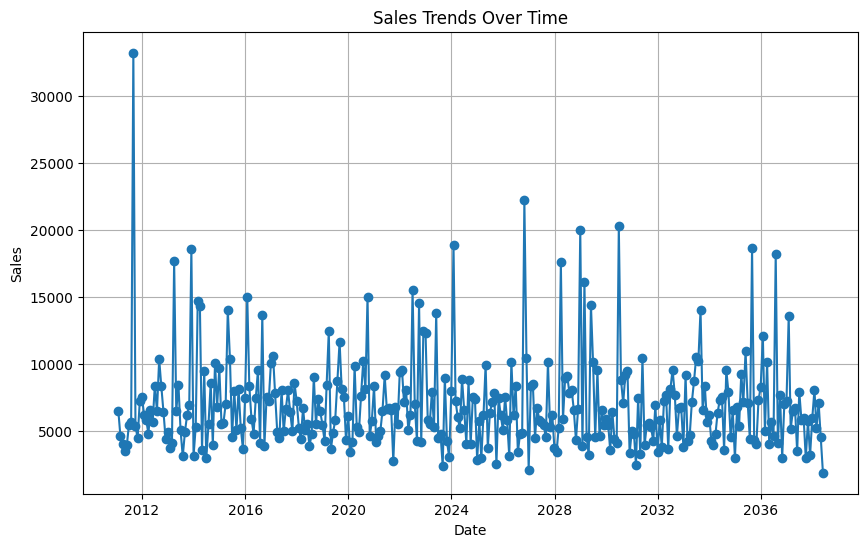

In [17]:
import matplotlib.pyplot as plt

# Create the line plot
plt.figure(figsize=(10,6))
plt.plot(df_monthly_sales.index, df_monthly_sales['Sales'], marker='o')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


6. Customize the Plot:

You can further customize the plot by adding labels, adjusting colors, or adding trend lines.

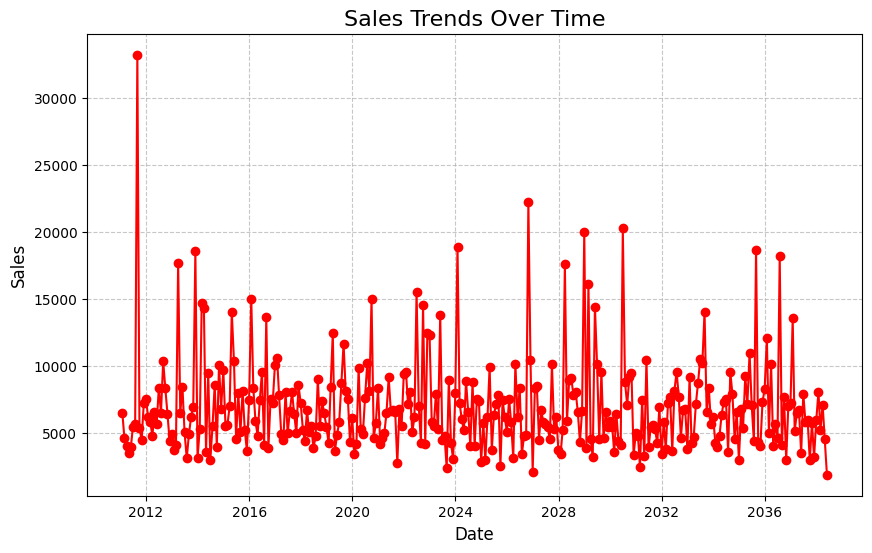

In [19]:
# Customize the plot
plt.figure(figsize=(10,6))
plt.plot(df_monthly_sales.index, df_monthly_sales['Sales'], marker='o', linestyle='-', color='r')
plt.title('Sales Trends Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


# Steps to Plot Sales Trends in Excel

1. Load the Data:

Open your dataset in Excel.
Make sure you have a date column and a sales column.

2. Prepare the Data:

Ensure the date column is formatted correctly as a date.

Sort the data by date to maintain the correct chronological order.

3. Insert a Line Chart:

Select both the date and sales columns.

Go to the Insert tab, and select Line Chart from the Charts section.

4. Customize the Chart:

Add a title by clicking on the chart and typing your desired title (e.g., "Sales Trends Over Time").

Label the axes by adding chart elements and choosing "Axis Titles."

5. Analyze the Trend:

Excel provides built-in options to add trend lines to your chart for additional insights.


# Steps to Plot Sales Trends in Power BI or Tablea

1. Load the Data:

Import your dataset into Power BI or Tableau by connecting to your file (Excel, CSV, database).

2. Prepare the Data:

Ensure that the date column is formatted as a date type.

If necessary, create a new calculated field to aggregate sales data (e.g., monthly sales, quarterly sales).

3. Create a Line Chart:

In Power BI or Tableau, drag the date field to the X-axis (Columns) and the sales field to the Y-axis (Rows).

In Power BI, choose the Line Chart from the Visualization pane.

In Tableau, you can automatically generate a line chart by placing the date on the Columns shelf and the sales on the Rows shelf.

4. Customize the Chart:

Add titles, labels, and adjust colors as needed.

You can add filters for specific time periods or product categories to analyze trends more deeply.

Conclusion:
The choice of tool depends on your requirements, but the overall process involves loading, preparing, and visualizing the data. A line chart is the best way to visualize sales trends over time, and tools like Python, Excel, Power BI, or Tableau are all effective for this purpose.

# **5. Sales and Profit Analysis:**

**Q1. How can you identify top-performing product categories based on total sales and profit? Describe the process.**

To identify top-performing product categories based on total sales and profit, you can follow a systematic process using data aggregation, analysis, and visualization. Below is a detailed step-by-step guide to this process, which can be implemented in tools like Excel, Python (Pandas), or Power BI/Tableau.

Step-by-Step Process:
1. Load and Clean the Data

The first step is to load the dataset and ensure that it contains columns such as:

Product Category(ProductName) (e.g.Avery 508)

Sales (total sales for the product)

Profit (total profit for the product)

In [20]:
import pandas as pd

# Load the dataset (assume CSV format)
df = pd.read_csv('sales_data.csv')

# Display first few rows
df.head()


,Date,Category,City,Country,CustomerName,Discount,OrderID,PostalCode,ProductName,Profit,...,DaystoShipActual,SalesForecast,ShipStatus,DaystoShipScheduled,OrderProfitable,SalesperCustomer,ProfitRatio,SalesaboveTarget,latitude,longitude
0,04-01-2011,Office Supplies,Houston,United States,Darren Powers,0.2,CA-2011-103800,77095,"Message Book, Wirebound, Four 5 1/2 X 4 Forms/...",6,...,4,22,Shipped Early,6,NaN,16.45,33.8,NaN,29.8941,-95.6481
1,05-01-2011,Office Supplies,Naperville,United States,Phillina Ober,0.2,CA-2011-112326,60540,Avery 508,4,...,4,15,Shipped Early,6,NaN,11.78,36.3,NaN,41.7662,-88.1410
2,06-01-2011,Office Supplies,Naperville,United States,Phillina Ober,0.8,CA-2011-112326,60540,GBC Standard Plastic Binding Systems Combs,-5,...,4,5,Shipped Early,6,NaN,3.54,-155.0,NaN,41.7662,-88.1410
3,07-01-2011,Office Supplies,Naperville,United States,Phillina Ober,0.2,CA-2011-112326,60540,SAFCO Boltless Steel Shelving,-65,...,4,357,Shipped Early,6,NaN,272.74,-23.8,NaN,41.7662,-88.1410
4,08-01-2011,Office Supplies,Philadelphia,United States,Mick Brown,0.2,CA-2011-141817,19143,Avery Hi-Liter EverBold Pen Style Fluorescent ...,5,...,7,26,Shipped Late,6,NaN,19.54,25.0,NaN,39.9448,-75.2288


**2. Aggregate the Data by Product Category**

To analyze total sales and profit for each category, you need to aggregate the data. Group the data by Product Category and calculate the total sales and total profit.

In Python (using Pandas):

In [24]:
# Group by product category and calculate total sales and profit
category_sales_profit = df.groupby('ProductName')[['Sales', 'Profit']].sum().reset_index()

# Sort categories by total sales or profit to identify top performers
category_sales_profit = category_sales_profit.sort_values(by='Sales', ascending=False)

# Display the aggregated result
category_sales_profit



,ProductName,Sales,Profit
402,Canon imageCLASS 2200 Advanced Copier,61600,25200
647,Fellowes PB500 Electric Punch Plastic Comb Bin...,27454,7751
442,Cisco TelePresence System EX90 Videoconferenci...,22638,-1811
782,HON 5400 Series Task Chairs for Big and Tall,21870,1
683,GBC DocuBind TL300 Electric Binding System,19824,2233
...,...,...,...
25,4009 Highlighters,8,3
780,Grip Seal Envelopes,7,2
1783,Xerox 20,6,3
206,Avery 5,6,3


# **In Excel:**

Use a Pivot Table to summarize total sales and total profit by Product Category.

Go to Insert > PivotTable, drag Product Category to Rows, and Sales and Profit to Values.

Sort the pivot table by Sales or Profit to identify the top categories.

# **In Power BI/Tableau:**

Drag Product Category to the Rows or Columns section.

Add Sales and Profit to the Values section to see the totals.

Sort the visualization by Sales or Profit to see the top-performing categories.


# **3. Visualize the Top-Performing Categories**

Visualizing the results can provide insights and make it easier to interpret the data.

In Python (Matplotlib/Seaborn):

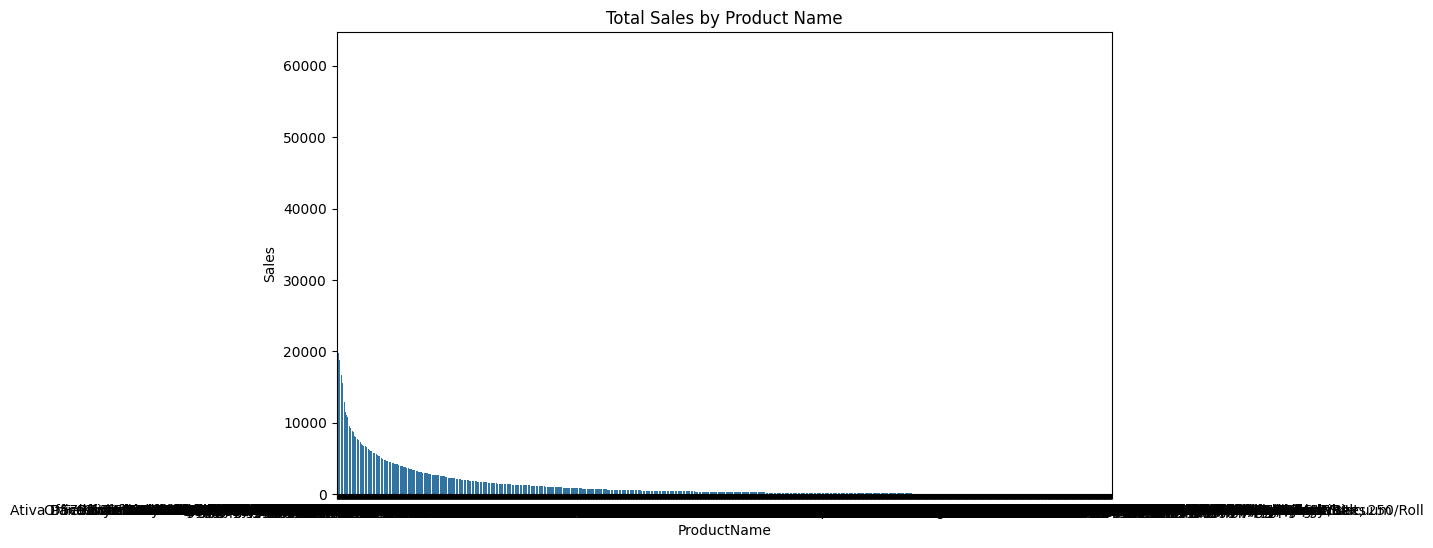

In [28]:
# For Sales

import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for sales and profit by category
plt.figure(figsize=(10, 6))
sns.barplot(x='ProductName', y='Sales', data=category_sales_profit)
plt.title('Total Sales by Product Name')
plt.show(10)


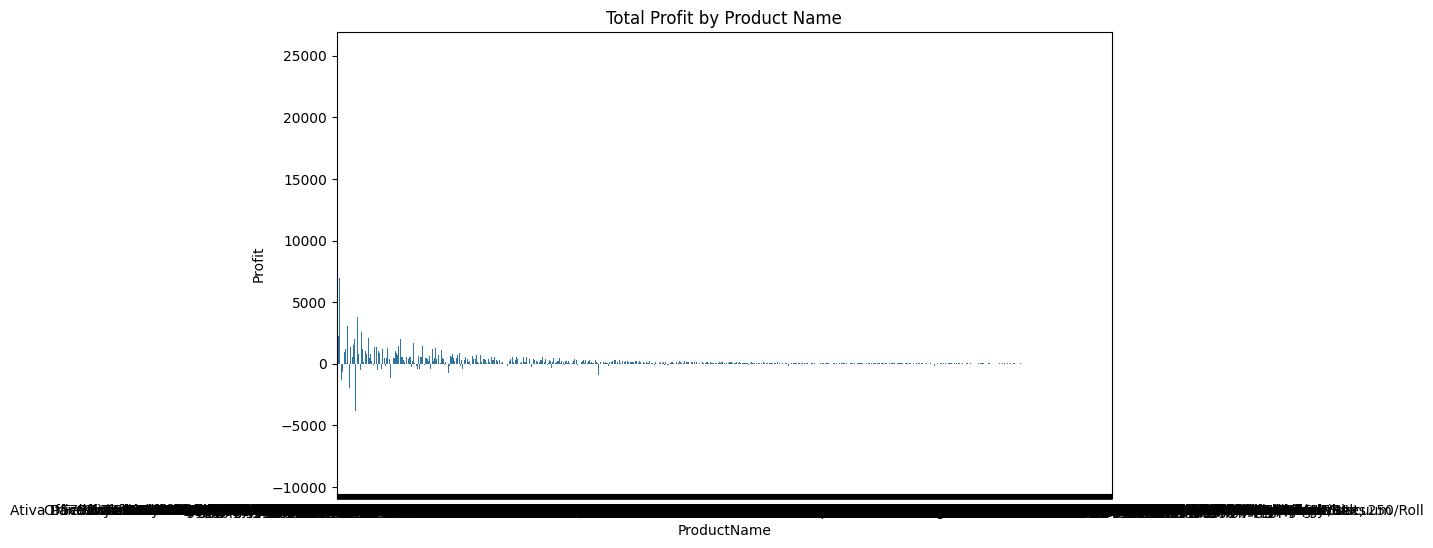

In [30]:
# Similarly, you can plot for Profit

# Bar chart for profit by category
plt.figure(figsize=(10, 6))
sns.barplot(x='ProductName', y='Profit', data=category_sales_profit) # Use barplot to display the profit values
plt.title('Total Profit by Product Name')
plt.show() # Remove the argument from plt.show()

# **OR**

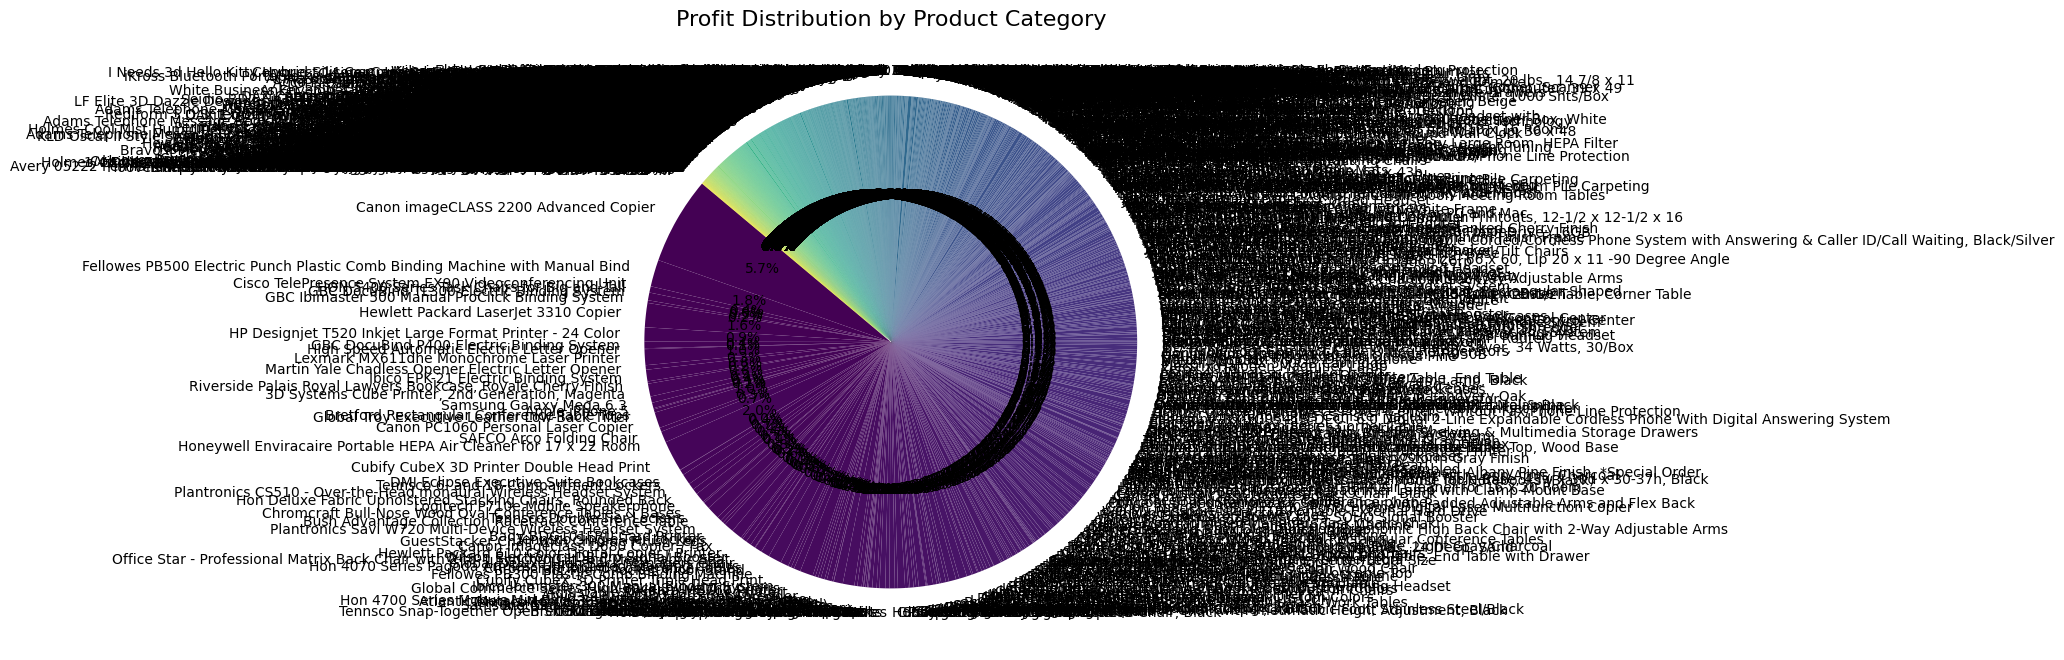

,Date,Category,City,Country,CustomerName,Discount,OrderID,PostalCode,ProductName,Profit,...,DaystoShipActual,SalesForecast,ShipStatus,DaystoShipScheduled,OrderProfitable,SalesperCustomer,ProfitRatio,SalesaboveTarget,latitude,longitude
0,04-01-2011,Office Supplies,Houston,United States,Darren Powers,0.2,CA-2011-103800,77095,"Message Book, Wirebound, Four 5 1/2 X 4 Forms/...",6,...,4,22,Shipped Early,6,NaN,16.45,33.8,NaN,29.8941,-95.6481
1,05-01-2011,Office Supplies,Naperville,United States,Phillina Ober,0.2,CA-2011-112326,60540,Avery 508,4,...,4,15,Shipped Early,6,NaN,11.78,36.3,NaN,41.7662,-88.1410
2,06-01-2011,Office Supplies,Naperville,United States,Phillina Ober,0.8,CA-2011-112326,60540,GBC Standard Plastic Binding Systems Combs,-5,...,4,5,Shipped Early,6,NaN,3.54,-155.0,NaN,41.7662,-88.1410
3,07-01-2011,Office Supplies,Naperville,United States,Phillina Ober,0.2,CA-2011-112326,60540,SAFCO Boltless Steel Shelving,-65,...,4,357,Shipped Early,6,NaN,272.74,-23.8,NaN,41.7662,-88.1410
4,08-01-2011,Office Supplies,Philadelphia,United States,Mick Brown,0.2,CA-2011-141817,19143,Avery Hi-Liter EverBold Pen Style Fluorescent ...,5,...,7,26,Shipped Late,6,NaN,19.54,25.0,NaN,39.9448,-75.2288


In [35]:
# Create a pie chart for profit distribution by product category
plt.figure(figsize=(8, 8))
# Calculate the absolute values of profits for the pie chart
positive_profits = category_sales_profit['Profit'].abs()
plt.pie(positive_profits, labels=category_sales_profit['ProductName'],
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(category_sales_profit)))

# Add title
plt.title('Profit Distribution by Product Category', fontsize=16)

# Show the plot
plt.show()

df.head()

# **In Excel:**

Select the Pivot Table and insert a Bar Chart or Column Chart to display total sales and profits for each category.

Sort the chart by Sales or Profit.

# **In Power BI/Tableau:**

Create a bar chart using Product Category as the X-axis and Sales/Profit as the Y-axis.

Use color coding or tooltips to display both sales and profit information.

# **4. Analyze the Results**

After aggregating and visualizing the data, analyze the results:

Identify the top-performing product categories in terms of total sales and total profit.

Compare sales and profit margins for each category to understand profitability.

Use this analysis to make decisions like focusing on high-performing categories or improving the profitability of low-performing categories.

# **5. Drill Down for Further Insights**

If needed, you can perform a drill-down analysis on each category:

Analyze sub-categories or individual products within each top-performing category.

Investigate seasonal trends, customer segments, or regional sales within these categories.

**Q2. Explain how you would analyze seasonal sales trends using historical sales data.**

Analyzing seasonal sales trends using historical sales data helps businesses understand how sales fluctuate during different times of the year. This analysis can be critical for making informed decisions on inventory, marketing, and staffing.

Step-by-Step Process for Analyzing Seasonal Sales Trends

1. Load and Prepare Historical Sales Data:

The first step is to load the historical sales data into a data analysis environment (like Python) and ensure it is structured correctly.

Key columns you will need are:

Date/Time (e.g., daily, weekly, or monthly sales)
Sales amount
Product Name
Region or other relevant segments (optional)

In [36]:

# Load the dataset
df = pd.read_csv('sales_data.csv', parse_dates=['Date'])

df.head()


,Date,Category,City,Country,CustomerName,Discount,OrderID,PostalCode,ProductName,Profit,...,DaystoShipActual,SalesForecast,ShipStatus,DaystoShipScheduled,OrderProfitable,SalesperCustomer,ProfitRatio,SalesaboveTarget,latitude,longitude
0,04-01-2011,Office Supplies,Houston,United States,Darren Powers,0.2,CA-2011-103800,77095,"Message Book, Wirebound, Four 5 1/2 X 4 Forms/...",6,...,4,22,Shipped Early,6,NaN,16.45,33.8,NaN,29.8941,-95.6481
1,05-01-2011,Office Supplies,Naperville,United States,Phillina Ober,0.2,CA-2011-112326,60540,Avery 508,4,...,4,15,Shipped Early,6,NaN,11.78,36.3,NaN,41.7662,-88.1410
2,06-01-2011,Office Supplies,Naperville,United States,Phillina Ober,0.8,CA-2011-112326,60540,GBC Standard Plastic Binding Systems Combs,-5,...,4,5,Shipped Early,6,NaN,3.54,-155.0,NaN,41.7662,-88.1410
3,07-01-2011,Office Supplies,Naperville,United States,Phillina Ober,0.2,CA-2011-112326,60540,SAFCO Boltless Steel Shelving,-65,...,4,357,Shipped Early,6,NaN,272.74,-23.8,NaN,41.7662,-88.1410
4,08-01-2011,Office Supplies,Philadelphia,United States,Mick Brown,0.2,CA-2011-141817,19143,Avery Hi-Liter EverBold Pen Style Fluorescent ...,5,...,7,26,Shipped Late,6,NaN,19.54,25.0,NaN,39.9448,-75.2288


2. Convert Dates into Components

To analyze seasonal trends, you need to break down the date column into useful components like month or quarter.

In [39]:
# Load the dataset and force the 'Date' column to datetime
df = pd.read_csv('sales_data.csv')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract month and year from the 'Date' column
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

df.head()



,Date,Category,City,Country,CustomerName,Discount,OrderID,PostalCode,ProductName,Profit,...,ShipStatus,DaystoShipScheduled,OrderProfitable,SalesperCustomer,ProfitRatio,SalesaboveTarget,latitude,longitude,Month,Year
0,2011-04-01,Office Supplies,Houston,United States,Darren Powers,0.2,CA-2011-103800,77095,"Message Book, Wirebound, Four 5 1/2 X 4 Forms/...",6,...,Shipped Early,6,NaN,16.45,33.8,NaN,29.8941,-95.6481,4.0,2011.0
1,2011-05-01,Office Supplies,Naperville,United States,Phillina Ober,0.2,CA-2011-112326,60540,Avery 508,4,...,Shipped Early,6,NaN,11.78,36.3,NaN,41.7662,-88.1410,5.0,2011.0
2,2011-06-01,Office Supplies,Naperville,United States,Phillina Ober,0.8,CA-2011-112326,60540,GBC Standard Plastic Binding Systems Combs,-5,...,Shipped Early,6,NaN,3.54,-155.0,NaN,41.7662,-88.1410,6.0,2011.0
3,2011-07-01,Office Supplies,Naperville,United States,Phillina Ober,0.2,CA-2011-112326,60540,SAFCO Boltless Steel Shelving,-65,...,Shipped Early,6,NaN,272.74,-23.8,NaN,41.7662,-88.1410,7.0,2011.0
4,2011-08-01,Office Supplies,Philadelphia,United States,Mick Brown,0.2,CA-2011-141817,19143,Avery Hi-Liter EverBold Pen Style Fluorescent ...,5,...,Shipped Late,6,NaN,19.54,25.0,NaN,39.9448,-75.2288,8.0,2011.0


3. Aggregate Sales Data by Time Period

Aggregate sales by the relevant time frame (e.g., monthly, quarterly) to see how sales fluctuate over the year.

This will help identify patterns.

In [41]:
# Group data by month to observe sales trends
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()

# For multi-year data, group by year and month
yearly_monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

df.head()

,Date,Category,City,Country,CustomerName,Discount,OrderID,PostalCode,ProductName,Profit,...,ShipStatus,DaystoShipScheduled,OrderProfitable,SalesperCustomer,ProfitRatio,SalesaboveTarget,latitude,longitude,Month,Year
0,2011-04-01,Office Supplies,Houston,United States,Darren Powers,0.2,CA-2011-103800,77095,"Message Book, Wirebound, Four 5 1/2 X 4 Forms/...",6,...,Shipped Early,6,NaN,16.45,33.8,NaN,29.8941,-95.6481,4.0,2011.0
1,2011-05-01,Office Supplies,Naperville,United States,Phillina Ober,0.2,CA-2011-112326,60540,Avery 508,4,...,Shipped Early,6,NaN,11.78,36.3,NaN,41.7662,-88.1410,5.0,2011.0
2,2011-06-01,Office Supplies,Naperville,United States,Phillina Ober,0.8,CA-2011-112326,60540,GBC Standard Plastic Binding Systems Combs,-5,...,Shipped Early,6,NaN,3.54,-155.0,NaN,41.7662,-88.1410,6.0,2011.0
3,2011-07-01,Office Supplies,Naperville,United States,Phillina Ober,0.2,CA-2011-112326,60540,SAFCO Boltless Steel Shelving,-65,...,Shipped Early,6,NaN,272.74,-23.8,NaN,41.7662,-88.1410,7.0,2011.0
4,2011-08-01,Office Supplies,Philadelphia,United States,Mick Brown,0.2,CA-2011-141817,19143,Avery Hi-Liter EverBold Pen Style Fluorescent ...,5,...,Shipped Late,6,NaN,19.54,25.0,NaN,39.9448,-75.2288,8.0,2011.0


4. Visualize Sales Trends Over Time

Visualization is a key step in identifying seasonal patterns. Line charts are particularly useful for visualizing sales trends over time.

Line Chart for Monthly Sales Trends:

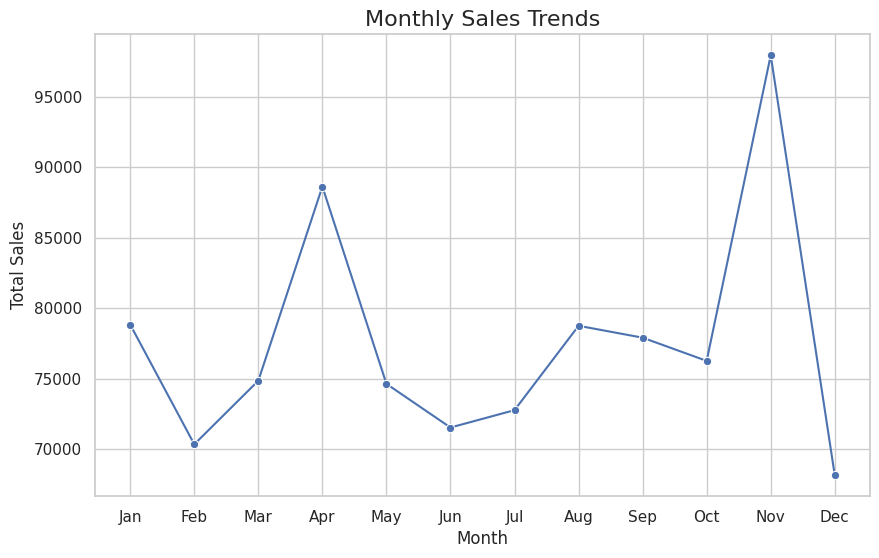

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create a line plot for monthly sales trends
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Sales', data=monthly_sales, marker='o', color='b')

# Add labels and title
plt.title('Monthly Sales Trends', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Show the plot
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


For multi-year data, you can use facet grids or line charts that distinguish between years:


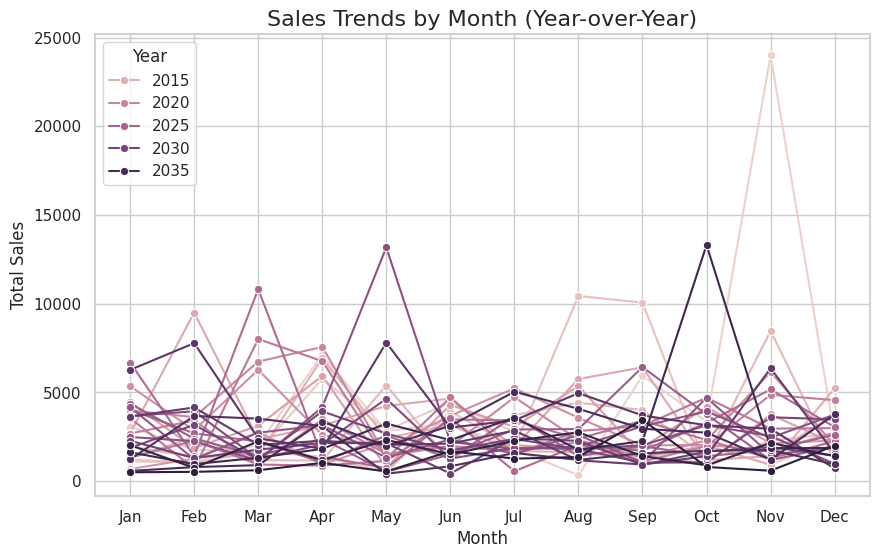

In [43]:
# Create a line plot to compare sales trends across multiple years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Sales', hue='Year', data=yearly_monthly_sales, marker='o')

# Add labels and title
plt.title('Sales Trends by Month (Year-over-Year)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Show the plot
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


5. Identify Peaks and Lows (Seasonality)

From the visualizations, you can identify peaks and valleys in sales. For instance, if sales consistently increase during December and dip during the summer, it indicates a holiday season effect.

6. Calculate Growth or Decline Across Seasons

Once you've identified the seasonal trends, calculate the growth or decline between seasons. This can be done by comparing sales from one time period to another.

In [44]:
# Calculate month-on-month percentage change in sales
monthly_sales['Sales Growth (%)'] = monthly_sales['Sales'].pct_change() * 100

# Display the result
monthly_sales


,Month,Sales,Sales Growth (%)
0,1.0,78839,NaN
1,2.0,70356,-10.759903
2,3.0,74863,6.405992
3,4.0,88622,18.378905
4,5.0,74641,-15.775992
5,6.0,71545,-4.147854
6,7.0,72777,1.721993
7,8.0,78755,8.214134
8,9.0,77913,-1.069138
9,10.0,76268,-2.111329


7. Incorporate External Factors

In some cases, external factors like holidays, weather, or promotions may contribute to sales trends. Include these as additional features in your analysis to refine the understanding of seasonality.

8. Forecasting Future Sales Trends

You can also use time series forecasting techniques (e.g., ARIMA, exponential smoothing) to predict future sales based on historical patterns. This step is optional but can be valuable for decision-making.

In [48]:

from statsmodels.tsa.arima.model import ARIMA # Import the ARIMA model from the correct module

# Fit an ARIMA model for forecasting (example)
model = ARIMA(df['Sales'], order=(1, 1, 1)) # Initialize the ARIMA model
fit_model = model.fit() # Remove the disp keyword argument

# Forecast the next 12 months
forecast = fit_model.forecast(steps=12) # Remove the [0] indexing

# Display the forecasted sales
print(forecast) # Use print to display the entire forecast object

9994     224.921725
9995     229.349473
9996     229.495864
9997     229.500704
9998     229.500864
9999     229.500870
10000    229.500870
10001    229.500870
10002    229.500870
10003    229.500870
10004    229.500870
10005    229.500870
Name: predicted_mean, dtype: float64


9. Take Action Based on Insights

Once the seasonal trends are identified, businesses can:

Adjust inventory levels: Stock more of popular items during peak seasons.

Optimize marketing: Run promotions and campaigns during low seasons to boost sales.

Resource allocation: Ensure adequate staffing and logistics during busy periods.

Conclusion

By following these steps, you can effectively analyze seasonal sales trends and make data-driven decisions. Visualizations such as line charts help easily identify when sales peak or drop, and forecasting methods allow you to predict future sales trends.

# **6. Grouped Statistics:**

***Q1. Why is it important to calculate grouped statistics for key variables? Provide an example using regional sales data. ***

**Importance of Calculating Grouped Statistics for Key Variables**

Grouped statistics are essential for understanding patterns, variations, and trends within subsets of data. When dealing with large datasets, calculating grouped statistics allows us to break down the data by specific categories or segments, such as regions, products, or time periods. This helps in identifying key differences or similarities among the groups, making it easier to tailor strategies for each segment.

Grouped statistics enable:

Data Simplification: Summarizing complex data by groups allows for more focused analysis.

Identifying Trends: Trends that are hidden in the overall dataset can emerge when looking at groups.

Better Decision Making: By understanding performance across groups (like regions or demographics), businesses can target specific strategies.

Comparisons: It allows for easy comparison between different groups.

Example: Regional Sales Data

Let’s consider an example where you have sales data broken down by region. You want to calculate grouped statistics like total sales, average sales, and sales variance for each region.

Step-by-Step Example in Python:

1. Load and Prepare Data

First, load the dataset that contains sales data for multiple regions.

In [49]:
# Sample data
data = {'Region': ['North', 'South', 'East', 'West', 'North', 'South', 'East', 'West'],
        'Sales': [1000, 1500, 800, 1200, 1100, 1600, 900, 1300]}

df = pd.DataFrame(data)
df.head()


,Region,Sales
0,North,1000
1,South,1500
2,East,800
3,West,1200
4,North,1100


2. Group the Data by Region

Group the data by the Region column to calculate regional statistics.

In [50]:
# Group by 'Region' and calculate statistics
grouped_stats = df.groupby('Region').agg(
    Total_Sales=('Sales', 'sum'),
    Average_Sales=('Sales', 'mean'),
    Sales_Variance=('Sales', 'var')
)

# Display the grouped statistics
grouped_stats


,Total_Sales,Average_Sales,Sales_Variance
Region,,,
East,1700,850.0,5000.0
North,2100,1050.0,5000.0
South,3100,1550.0,5000.0
West,2500,1250.0,5000.0


Total Sales: The South region has the highest total sales (3100), which indicates a strong performance in that area.

Average Sales: The South region also has the highest average sales per instance (1550), showing consistent high sales.

Sales Variance: The variance is the same across all regions in this example, indicating a similar spread of sales figures in each region.

**4. Benefits of Grouped Statistics in Regional Sales**

Tailored Marketing: If the South region is performing well, you may want to invest more in marketing efforts in this region.

Inventory Decisions: Higher sales in the South might indicate the need for more inventory or better logistics in that region.

Resource Allocation: Resources like staffing and budgeting can be allocated more efficiently based on performance in each region.

Conclusion

Calculating grouped statistics for key variables like sales by region provides valuable insights that can guide decision-making, uncover trends, and enable more strategic planning. These insights can be applied across various contexts, such as customer segments, time periods, or product categories.